# **Minería de Datos: Deserción Estudiantil**

## **I. Fase de Preparación de los Datos**

### **A. Instalación de Librerías y Opciones Iniciales**

In [129]:
%pip install sdv

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pymysql
import pandas as pd

pd.set_option('display.max_rows', 20)
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

### **B. Conexión y Recuperación de Datos**

In [7]:
connection = pymysql.connect(
    host="localhost",
    user="admin",
    password="****",
    database="****"
)

# Consulta SQL para extraer los datos relevantes
query = '''SELECT e.Id_Estudiante, e.Nombre_Estudiante, e.ApellidoPaterno_Estudiante,
            e.ApellidoMaterno_Estudiante, e.Sexo, e.Id_Escuela, e.AnioIngreso, m.IdMatricula, m.IdCurso,
            m.Periodo_Matricula, m.Num_Vez, c.Creditos_Curso, c.Ciclo_Curso FROM estudiante e
            JOIN matricula m ON e.Id_Estudiante = m.IdEstudiante JOIN curso c ON m.IdCurso = c.Id_Curso
        WHERE  m.Periodo_Matricula != '2024-I';
        '''

# Ejecutar la consulta y cargar los datos en un DataFrame de pandas
data = pd.read_sql(query, connection)
data.to_csv('estudiantes.csv', index=False)

query_1 = '''SELECT e.Id_Estudiante, e.Nombre_Estudiante, e.ApellidoPaterno_Estudiante,
            e.ApellidoMaterno_Estudiante, e.Sexo, e.Id_Escuela, e.AnioIngreso, m.IdMatricula, m.IdCurso,
            m.Periodo_Matricula, m.Num_Vez, c.Creditos_Curso, c.Ciclo_Curso FROM estudiante e
            JOIN matricula m ON e.Id_Estudiante = m.IdEstudiante JOIN curso c ON m.IdCurso = c.Id_Curso
        WHERE  m.Periodo_Matricula = '2024-I';
        '''
data_prueba = pd.read_sql(query_1, connection)
data_prueba.to_csv('nuevos_estudiantes.csv', index=False)

# Cerrar la conexión
connection.close()

# Mostrar los primeros registros del DataFrame
display(data)

,Id_Estudiante,Nombre_Estudiante,ApellidoPaterno_Estudiante,ApellidoMaterno_Estudiante,Sexo,Id_Escuela,AnioIngreso,IdMatricula,IdCurso,Periodo_Matricula,Num_Vez,Creditos_Curso,Ciclo_Curso
0,1052701616,HEYNER JHONEL,ARTEAGA,SANCHEZ,M,1,2016,4,1,2018-I,1,3,1
1,1052702016,JORGE ALEXIS,AVILA,SALINAS,M,1,2016,14,1,2018-I,1,3,1
2,1022700716,JENNER JOHANN,ESPINOLA,BENITES,M,1,2016,21,1,2018-I,1,3,1
3,1052702516,ANGHELA CAROLINA,FERNANDEZ,ESTRADA,F,1,2016,26,1,2018-I,1,3,1
4,1022700116,KEVIN RODOLFO,LOLI,SEVILLANO,M,1,2016,31,1,2018-I,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13146,1052700123,HECTOR YOLVI,HERRERA,CRUZ,M,1,2023,11254,65,2023-I,1,1,1
13147,1022700323,LUIS ANGEL,SAUCEDO,LULICHAC,M,1,2023,11444,65,2023-I,1,1,1
13148,1052700723,JOSE GABRIEL,TANDAYPAN,PEREDA,M,1,2023,11469,65,2023-I,1,1,1
13149,1022700223,ROSA ANGELICA,VALDERRAMA,NECIOSUP,F,1,2023,11488,65,2023-I,1,1,1


### **C. Limpieza de Datos**
La limpieza de datos implica manejar valores nulos, duplicados y corregir errores en los datos.

In [8]:
# Cargar datos
data = pd.read_csv('estudiantes.csv')  # Ejemplo de archivo CSV

# Eliminación de Duplicados
data = data.drop_duplicates()

# Eliminar filas con muchos valores nulos
data = data.dropna(thresh=int(data.shape[1] * 0.8))  # Mantener filas con al menos el 80% de los valores no nulos

# Imputación de valores nulos
data['Creditos_Curso'].fillna(data['Creditos_Curso'].median(), inplace=True)
data['Num_Vez'].fillna(data['Num_Vez'].median(), inplace=True)


# Mostrar los primeros registros del DataFrame
display(data)
data.to_csv('estudiantes.csv', index=False)


,Id_Estudiante,Nombre_Estudiante,ApellidoPaterno_Estudiante,ApellidoMaterno_Estudiante,Sexo,Id_Escuela,AnioIngreso,IdMatricula,IdCurso,Periodo_Matricula,Num_Vez,Creditos_Curso,Ciclo_Curso
0,1052701616,HEYNER JHONEL,ARTEAGA,SANCHEZ,M,1,2016,4,1,2018-I,1,3,1
1,1052702016,JORGE ALEXIS,AVILA,SALINAS,M,1,2016,14,1,2018-I,1,3,1
2,1022700716,JENNER JOHANN,ESPINOLA,BENITES,M,1,2016,21,1,2018-I,1,3,1
3,1052702516,ANGHELA CAROLINA,FERNANDEZ,ESTRADA,F,1,2016,26,1,2018-I,1,3,1
4,1022700116,KEVIN RODOLFO,LOLI,SEVILLANO,M,1,2016,31,1,2018-I,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13146,1052700123,HECTOR YOLVI,HERRERA,CRUZ,M,1,2023,11254,65,2023-I,1,1,1
13147,1022700323,LUIS ANGEL,SAUCEDO,LULICHAC,M,1,2023,11444,65,2023-I,1,1,1
13148,1052700723,JOSE GABRIEL,TANDAYPAN,PEREDA,M,1,2023,11469,65,2023-I,1,1,1
13149,1022700223,ROSA ANGELICA,VALDERRAMA,NECIOSUP,F,1,2023,11488,65,2023-I,1,1,1


### **D. Generación de Características**
Creación de nuevas características que puedan ser útiles para el modelo predictivo.

In [9]:
# Carga Académica Total
data['Total_Creditos'] = data.groupby('Id_Estudiante')['Creditos_Curso'].transform('sum')

# Años en la Universidad
current_year = 2024  # Año actual
data['Anios_En_Universidad'] = current_year - data['AnioIngreso']

# Número de Matrículas
data['Total_Matriculas'] = data.groupby('Id_Estudiante')['IdMatricula'].transform('count')

# Mostrar los primeros registros del DataFrame
display(data)
data.to_csv('estudiantes.csv', index=False)

,Id_Estudiante,Nombre_Estudiante,ApellidoPaterno_Estudiante,ApellidoMaterno_Estudiante,Sexo,Id_Escuela,AnioIngreso,IdMatricula,IdCurso,Periodo_Matricula,Num_Vez,Creditos_Curso,Ciclo_Curso,Total_Creditos,Anios_En_Universidad,Total_Matriculas
0,1052701616,HEYNER JHONEL,ARTEAGA,SANCHEZ,M,1,2016,4,1,2018-I,1,3,1,151,8,43
1,1052702016,JORGE ALEXIS,AVILA,SALINAS,M,1,2016,14,1,2018-I,1,3,1,140,8,42
2,1022700716,JENNER JOHANN,ESPINOLA,BENITES,M,1,2016,21,1,2018-I,1,3,1,115,8,33
3,1052702516,ANGHELA CAROLINA,FERNANDEZ,ESTRADA,F,1,2016,26,1,2018-I,1,3,1,15,8,5
4,1022700116,KEVIN RODOLFO,LOLI,SEVILLANO,M,1,2016,31,1,2018-I,1,3,1,66,8,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13146,1052700123,HECTOR YOLVI,HERRERA,CRUZ,M,1,2023,11254,65,2023-I,1,1,1,44,1,14
13147,1022700323,LUIS ANGEL,SAUCEDO,LULICHAC,M,1,2023,11444,65,2023-I,1,1,1,44,1,14
13148,1052700723,JOSE GABRIEL,TANDAYPAN,PEREDA,M,1,2023,11469,65,2023-I,1,1,1,44,1,14
13149,1022700223,ROSA ANGELICA,VALDERRAMA,NECIOSUP,F,1,2023,11488,65,2023-I,1,1,1,44,1,14


### **E. Transformación de Datos**
Convertir los datos a un formato adecuado para el modelado, incluyendo la codificación de variables categóricas y normalización.

In [10]:
from sklearn.preprocessing import StandardScaler
# Eliminación de columnas no relevantes
data = data.drop(columns=['Nombre_Estudiante', 'ApellidoPaterno_Estudiante', 'ApellidoMaterno_Estudiante'])

# Separar `Periodo_Matricula` en `Año` y `Semestre`
data['Anio'] = data['Periodo_Matricula'].apply(lambda x: int(x.split('-')[0]))
data['Semestre'] = data['Periodo_Matricula'].apply(lambda x: x.split('-')[1])

# Determinar el último período disponible
ultimo_periodo = "2023-II"

# Crear una tabla pivote para verificar si el estudiante se ha matriculado en el último período
pivot = data.pivot_table(index='Id_Estudiante', columns='Periodo_Matricula', values='IdMatricula', aggfunc='count', fill_value=0)

# Crear la variable de deserción
data['Desercion'] = data['Id_Estudiante'].apply(lambda x: 0 if pivot.loc[x, ultimo_periodo] > 0 else 1)



# Cargar datos de egresados
egresados = pd.read_csv('EGRESADOS.csv', encoding='ISO-8859-1')

# Ajustar la variable de deserción según los egresados
# Si un estudiante está en la lista de egresados, marcar su deserción como 0, sin importar el valor anterior
data.loc[data['Id_Estudiante'].isin(egresados['Matricula_aux']), 'Desercion'] = 0


# Codificación de `Semestre` utilizando One-Hot Encoding
data = pd.get_dummies(data, columns=['Semestre'])

# Codificación de Variables Categóricas
data = pd.get_dummies(data, columns=['Sexo', 'Id_Escuela'])

# Normalización de Datos
scaler = StandardScaler()
data[['Total_Creditos', 'Anios_En_Universidad', 'Total_Matriculas']] = scaler.fit_transform(
    data[['Total_Creditos', 'Anios_En_Universidad', 'Total_Matriculas']]
)

# Eliminación de la columna original `Periodo_Matricula`
data = data.drop(columns=['Periodo_Matricula'])

display(data)
data.to_csv('estudiantes.csv', index=False)

,Id_Estudiante,AnioIngreso,IdMatricula,IdCurso,Num_Vez,Creditos_Curso,Ciclo_Curso,Total_Creditos,Anios_En_Universidad,Total_Matriculas,Anio,Desercion,Semestre_I,Semestre_II,Sexo_F,Sexo_M,Id_Escuela_1
0,1052701616,2016,4,1,1,3,1,0.097080,2.277549,0.105633,2018,1,True,False,False,True,True
1,1052702016,2016,14,1,1,3,1,-0.087802,2.277549,0.042188,2018,0,True,False,False,True,True
2,1022700716,2016,21,1,1,3,1,-0.507989,2.277549,-0.528811,2018,1,True,False,False,True,True
3,1052702516,2016,26,1,1,3,1,-2.188736,2.277549,-2.305253,2018,1,True,False,True,False,True
4,1022700116,2016,31,1,1,3,1,-1.331555,2.277549,-1.353587,2018,1,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13146,1052700123,2023,11254,65,1,1,1,-1.701320,-1.848646,-1.734254,2023,0,True,False,False,True,True
13147,1022700323,2023,11444,65,1,1,1,-1.701320,-1.848646,-1.734254,2023,0,True,False,False,True,True
13148,1052700723,2023,11469,65,1,1,1,-1.701320,-1.848646,-1.734254,2023,0,True,False,False,True,True
13149,1022700223,2023,11488,65,1,1,1,-1.701320,-1.848646,-1.734254,2023,0,True,False,True,False,True


### **F. División de los Datos**
Dividir los datos en conjuntos de entrenamiento y prueba.

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# División en conjuntos de entrenamiento y prueba
X = data.drop(['Id_Estudiante', 'IdMatricula', 'Desercion'], axis=1)
y = data['Desercion']
display(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificación de las primeras filas del conjunto de entrenamiento
display(data)

# Guardar el conjunto de datos preparado en un archivo CSV
data.to_csv('datos_estudiantes_preparados.csv', index=False)

,AnioIngreso,IdCurso,Num_Vez,Creditos_Curso,Ciclo_Curso,Total_Creditos,Anios_En_Universidad,Total_Matriculas,Anio,Semestre_I,Semestre_II,Sexo_F,Sexo_M,Id_Escuela_1
0,2016,1,1,3,1,0.097080,2.277549,0.105633,2018,True,False,False,True,True
1,2016,1,1,3,1,-0.087802,2.277549,0.042188,2018,True,False,False,True,True
2,2016,1,1,3,1,-0.507989,2.277549,-0.528811,2018,True,False,False,True,True
3,2016,1,1,3,1,-2.188736,2.277549,-2.305253,2018,True,False,True,False,True
4,2016,1,1,3,1,-1.331555,2.277549,-1.353587,2018,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13146,2023,65,1,1,1,-1.701320,-1.848646,-1.734254,2023,True,False,False,True,True
13147,2023,65,1,1,1,-1.701320,-1.848646,-1.734254,2023,True,False,False,True,True
13148,2023,65,1,1,1,-1.701320,-1.848646,-1.734254,2023,True,False,False,True,True
13149,2023,65,1,1,1,-1.701320,-1.848646,-1.734254,2023,True,False,True,False,True


,Id_Estudiante,AnioIngreso,IdMatricula,IdCurso,Num_Vez,Creditos_Curso,Ciclo_Curso,Total_Creditos,Anios_En_Universidad,Total_Matriculas,Anio,Desercion,Semestre_I,Semestre_II,Sexo_F,Sexo_M,Id_Escuela_1
0,1052701616,2016,4,1,1,3,1,0.097080,2.277549,0.105633,2018,1,True,False,False,True,True
1,1052702016,2016,14,1,1,3,1,-0.087802,2.277549,0.042188,2018,0,True,False,False,True,True
2,1022700716,2016,21,1,1,3,1,-0.507989,2.277549,-0.528811,2018,1,True,False,False,True,True
3,1052702516,2016,26,1,1,3,1,-2.188736,2.277549,-2.305253,2018,1,True,False,True,False,True
4,1022700116,2016,31,1,1,3,1,-1.331555,2.277549,-1.353587,2018,1,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13146,1052700123,2023,11254,65,1,1,1,-1.701320,-1.848646,-1.734254,2023,0,True,False,False,True,True
13147,1022700323,2023,11444,65,1,1,1,-1.701320,-1.848646,-1.734254,2023,0,True,False,False,True,True
13148,1052700723,2023,11469,65,1,1,1,-1.701320,-1.848646,-1.734254,2023,0,True,False,False,True,True
13149,1022700223,2023,11488,65,1,1,1,-1.701320,-1.848646,-1.734254,2023,0,True,False,True,False,True


In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Entrenar el modelo
gb_model = GradientBoostingClassifier(n_estimators=50, random_state=1, learning_rate=0.1, subsample=0.1, max_depth=1, max_features='sqrt')
gb_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_gb = gb_model.predict(X_test)

# Evaluar el modelo
print("Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))
print("Validación Cruzada (Accuracy):", cross_val_score(gb_model, X, y, cv=5).mean())
print("Precisión:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      3288
           1       0.87      0.25      0.38       658

    accuracy                           0.87      3946
   macro avg       0.87      0.62      0.66      3946
weighted avg       0.87      0.87      0.84      3946

Validación Cruzada (Accuracy): 0.7814920666577064
Precisión: 0.8682209832742017


In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Cargar nuevos datos
nuevos_datos = pd.read_csv('nuevos_estudiantes.csv')  # Ejemplo de archivo CSV

# Aplicar el mismo preprocesamiento
nuevos_datos = nuevos_datos.drop_duplicates()
nuevos_datos = nuevos_datos.dropna(thresh=int(nuevos_datos.shape[1] * 0.8))
nuevos_datos['Creditos_Curso'].fillna(nuevos_datos['Creditos_Curso'].median(), inplace=True)
nuevos_datos['Num_Vez'].fillna(nuevos_datos['Num_Vez'].median(), inplace=True)

nuevos_datos['Total_Creditos'] = nuevos_datos.groupby('Id_Estudiante')['Creditos_Curso'].transform('sum')
current_year = 2024
nuevos_datos['Anios_En_Universidad'] = current_year - nuevos_datos['AnioIngreso']
nuevos_datos['Total_Matriculas'] = nuevos_datos.groupby('Id_Estudiante')['IdMatricula'].transform('count')

nuevos_datos = nuevos_datos.drop(columns=['Nombre_Estudiante', 'ApellidoPaterno_Estudiante', 'ApellidoMaterno_Estudiante'])

nuevos_datos['Anio'] = nuevos_datos['Periodo_Matricula'].apply(lambda x: int(x.split('-')[0]))
nuevos_datos['Semestre'] = nuevos_datos['Periodo_Matricula'].apply(lambda x: x.split('-')[1])

nuevos_datos = pd.get_dummies(nuevos_datos, columns=['Semestre'])
nuevos_datos['Semestre_II']=False
nuevos_datos = pd.get_dummies(nuevos_datos, columns=['Sexo', 'Id_Escuela'])

scaler = StandardScaler()
nuevos_datos[['Total_Creditos', 'Anios_En_Universidad', 'Total_Matriculas']] = scaler.fit_transform(
    nuevos_datos[['Total_Creditos', 'Anios_En_Universidad', 'Total_Matriculas']]
)

# Guardar los IDs de los estudiantes para referencias futuras
ids_estudiantes = nuevos_datos['Id_Estudiante']
nuevos_datos = nuevos_datos.drop(columns=['Id_Estudiante', 'IdMatricula','Periodo_Matricula'])

# Mostrar los primeros registros del DataFrame preprocesado
display(nuevos_datos)


,AnioIngreso,IdCurso,Num_Vez,Creditos_Curso,Ciclo_Curso,Total_Creditos,Anios_En_Universidad,Total_Matriculas,Anio,Semestre_I,Semestre_II,Sexo_F,Sexo_M,Id_Escuela_1
0,2023,14,1,3,3,0.581319,-0.546203,0.242518,2024,True,False,False,True,True
1,2023,17,1,4,3,0.581319,-0.546203,0.242518,2024,True,False,False,True,True
2,2023,4,2,3,1,0.581319,-0.546203,0.242518,2024,True,False,False,True,True
3,2023,15,1,4,3,0.581319,-0.546203,0.242518,2024,True,False,False,True,True
4,2023,13,1,4,3,0.581319,-0.546203,0.242518,2024,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2020,48,1,4,9,-0.497061,1.224569,-0.571413,2024,True,False,False,True,True
1711,2020,49,1,4,9,-0.497061,1.224569,-0.571413,2024,True,False,False,True,True
1712,2020,52,1,2,9,-0.497061,1.224569,-0.571413,2024,True,False,False,True,True
1713,2020,50,1,4,9,-0.497061,1.224569,-0.571413,2024,True,False,False,True,True


In [27]:
# Cargar el modelo seleccionado
modelo_seleccionado = GradientBoostingClassifier(n_estimators=50, random_state=1, learning_rate=0.1, subsample=0.1, max_depth=1, max_features='sqrt')
modelo_seleccionado.fit(X_train, y_train)  # Entrenar el modelo con los datos de entrenamiento

# Hacer predicciones sobre los nuevos datos
predicciones = modelo_seleccionado.predict(nuevos_datos)

# Crear un DataFrame con los resultados
resultados = pd.DataFrame({
    'Id_Estudiante': ids_estudiantes,
    'Desercion_Predicha': predicciones
})
# Eliminar duplicados por 'Id_Estudiante' y mantener la primera ocurrencia
resultados = resultados.drop_duplicates(subset='Id_Estudiante', keep='first')

# Mostrar los resultados
display(resultados)

# Guardar los resultados en un archivo CSV
resultados.to_csv('predicciones_desercion.csv', index=False)


,Id_Estudiante,Desercion_Predicha
0,1512700523,0
6,1512700719,0
7,1052701223,0
10,1012701220,1
11,1012701023,0
...,...,...
1689,1512701120,0
1694,1052701323,0
1700,1052701721,1
1703,1512701324,0


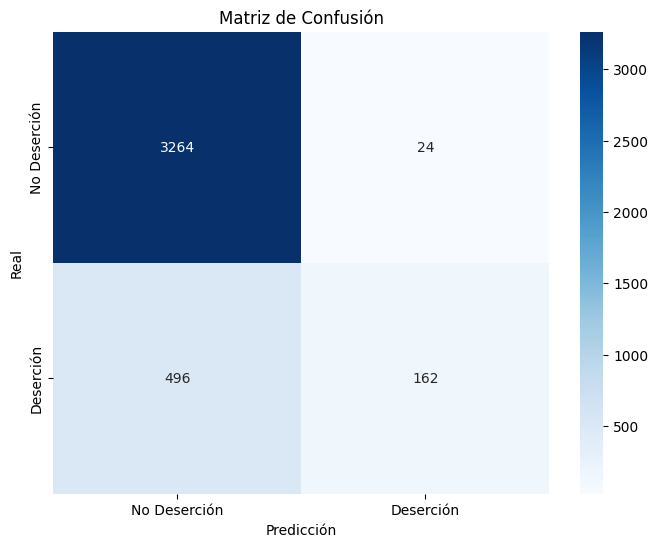

In [26]:
# Matriz de Confusión
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Deserción', 'Deserción'], yticklabels=['No Deserción', 'Deserción'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


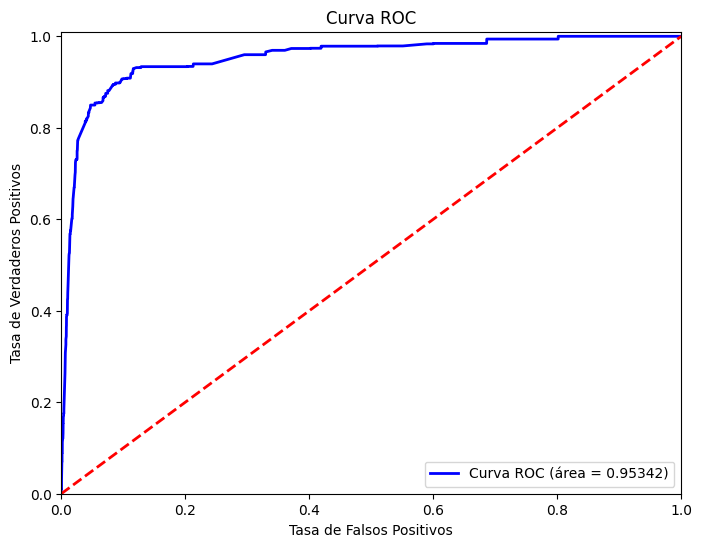

In [39]:
from sklearn.metrics import roc_curve, auc
# Curva ROC
y_val_prob = modelo_seleccionado.predict_proba(X)[:, 1]
fpr, tpr, _ = roc_curve(y, y_val_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (área = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


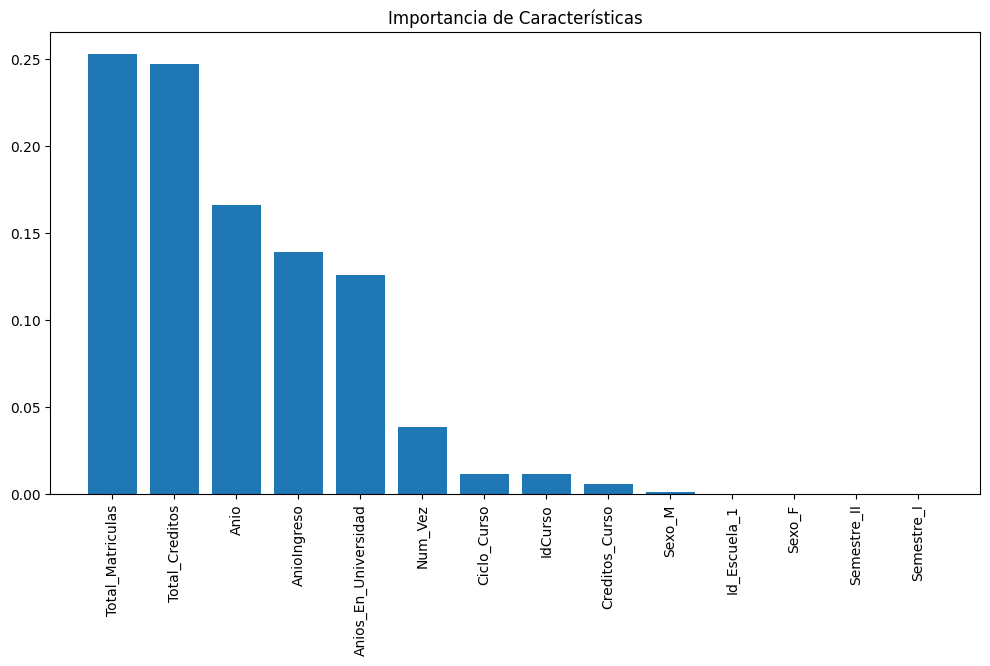

In [17]:
import numpy as np
importances = modelo_seleccionado.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(12, 6))
plt.title('Importancia de Características')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


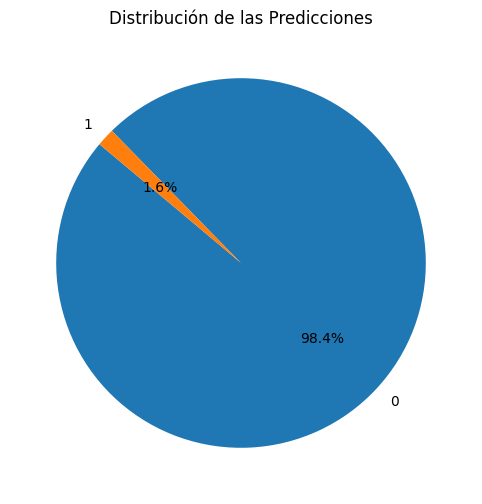

In [42]:
# Agrupar los datos
from collections import Counter
conteo_predicciones = Counter(predicciones)
categorias = list(conteo_predicciones.keys())
frecuencias = list(conteo_predicciones.values())

plt.figure(figsize=(10, 6))
plt.pie(frecuencias, labels=categorias, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de las Predicciones')
plt.show()

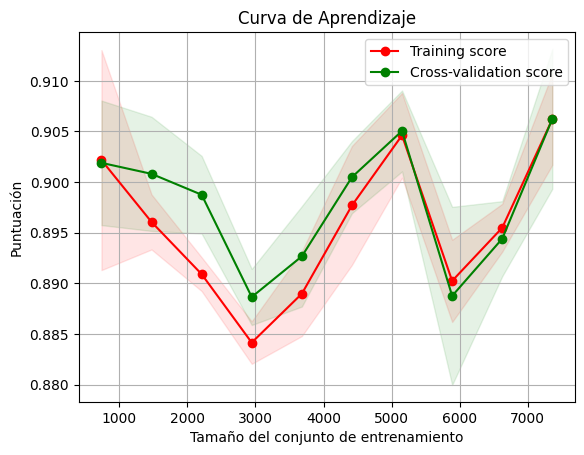

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Definir el modelo con los mejores hiperparámetros
# modelo_seleccionado = ...

train_sizes, train_scores, test_scores = learning_curve(
    modelo_seleccionado, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

# Añadir bandas de error
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')

plt.title('Curva de Aprendizaje')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Puntuación')
plt.legend(loc='best')
plt.grid()
plt.show()